In [1]:
import numpy as np
import matplotlib.pyplot as plt

from astropy import cosmology
from astropy import units as u

plt.rcParams.update({'font.size': 16})

In [2]:
# set up the universe with the parameters you want:
universe=cosmology.LambdaCDM(H0=72, Om0=0.3, Ode0=0.7)

# for full documentation of the cosmology package, see
# https://docs.astropy.org/en/stable/cosmology/index.html

In [3]:
# set up some redshifts of interest
zs = [0.0, 0.1, 0.5]

# calculate interesting quantities at those redshifts
for z in zs:
    
    print ('Redshift = {:.2f}'.format(z))
    
    ######################
    # LUMINOSITY DISTANCE (DL) is what you use when calculating apparent magnitudes,
    # i.e., m - M = 5*np.log10(DL) - 5 (and remember DL should have units of parsecs!)
    DL=universe.luminosity_distance(z)
    print('  Luminosity distance is {:.2f}'.format(DL))

    # but before you stuff it into the mag-distance equation, make sure DL is in parsecs, 
    # and that you’ve converted it to a regular python number:
    DL_pc = DL.to(u.pc).value
    # and now you can use DL_pc to convert between apparent and absolute magnitudes

    ######################
    # ANGULAR DIAMETER DISTANCE (DA) is what you use when converting between 
    # angular size (alpha) and physical size (d_phys):
    # d_phys = alpha[arcsec]*DA/206265
    # or
    # d_phys =  DA * np.tan(alpha[radians])
    DA=universe.angular_diameter_distance(z)
    print('  Angular diameter distance is {:.2f}'.format(DA))

    # again, you can convert it to a regular number and unit, for example kpc
    DA_kpc = DA.to(u.kpc).value
    # and now you can use DA_kpc to convert between angular size and physical size
    # in kpc

    ######################
    # AGES AND LOOKBACK TIMES can be worked out this way:
    print('  Universe age is {:.2f}'.format(universe.age(z)))
    print('  Lookback time is {:.2f}'.format(universe.lookback_time(z)))

Redshift = 0.00
  Luminosity distance is 0.00 Mpc
  Angular diameter distance is 0.00 Mpc
  Universe age is 13.09 Gyr
  Lookback time is 0.00 Gyr
Redshift = 0.10
  Luminosity distance is 447.51 Mpc
  Angular diameter distance is 369.85 Mpc
  Universe age is 11.83 Gyr
  Lookback time is 1.27 Gyr
Redshift = 0.50
  Luminosity distance is 2754.25 Mpc
  Angular diameter distance is 1224.11 Mpc
  Universe age is 8.19 Gyr
  Lookback time is 4.90 Gyr


Text(0, 0.5, 'Scale Factor')

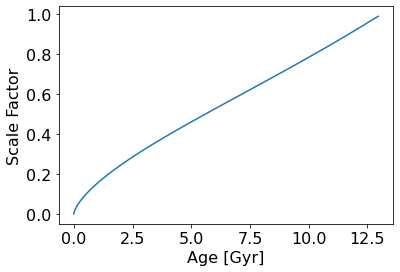

In [4]:
# you can plot R(t) like this:
logz=np.arange(3,-2,-0.01)
z=10**logz
R=universe.scale_factor(z)
t=universe.age(z)
plt.plot(t,R)
plt.xlabel('Age [Gyr]')
plt.ylabel('Scale Factor')